In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from bs4 import BeautifulSoup
import yfinance as yf
import json
import requests

In [3]:
apple = yf.Ticker('AAPL')

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

response = requests.get(url)

if response.status_code == 200:
    with open("apple.json", "wb") as f:
        f.write(response.content)
    print("Download success")
else:
    print("Download problem")

Download success


In [5]:
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    print(apple_info)
    type(apple_info)
apple_info

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

# Extracting Share Price

In [6]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,166.910004,168.960007,166.830002,168.220001,58499100,0.0,0.0
2023-10-30 00:00:00-04:00,169.020004,171.169998,168.869995,170.289993,51131000,0.0,0.0
2023-10-31 00:00:00-04:00,169.350006,170.899994,167.899994,170.770004,44846000,0.0,0.0


In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


In [8]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

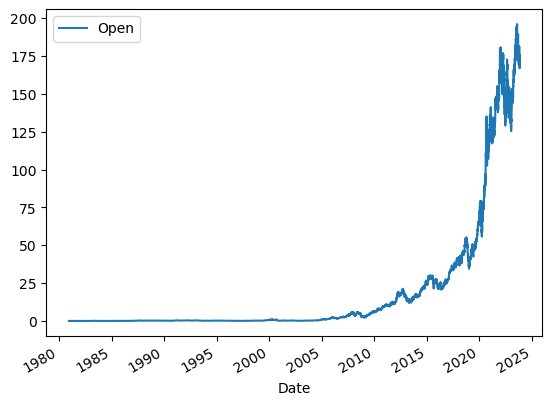

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

## Extracting Dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
Name: Dividends, Length: 80, dtype: float64


<Axes: xlabel='Date'>

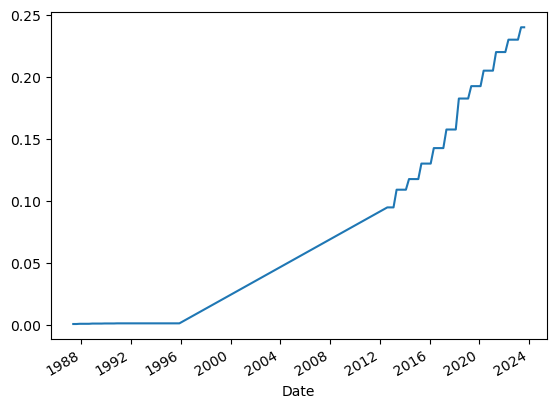

In [10]:
print(apple.dividends)
apple.dividends.plot()

---

In [11]:
AMD = yf.Ticker('AMD')

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"
response = requests.get(url)

if response.status_code == 200:
    with open("amd.json", "wb") as f:
        f.write(response.content)
    print("Download success 'amd.json'.")
else:
    print("Download problem")


Download success 'amd.json'.


In [13]:
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    print(amd_info)
    print(type(amd_info))
amd_info

{'zip': '95054', 'sector': 'Technology', 'fullTimeEmployees': 15500, 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphics 

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [14]:
AMD.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,95.800003,97.349998,94.589996,96.430000,52458700,0.0,0.0
2023-10-30 00:00:00-04:00,96.139999,97.040001,94.699997,96.180000,43716600,0.0,0.0
2023-10-31 00:00:00-04:00,96.239998,98.820000,94.070000,98.500000,79547100,0.0,0.0


In [15]:
print(amd_info["country"], amd_info["sector"])

United States Technology


In [16]:
AMD.history(period="max")["Volume"]

Date
1980-03-17 00:00:00-05:00       219600
1980-03-18 00:00:00-05:00       727200
1980-03-19 00:00:00-05:00       295200
1980-03-20 00:00:00-05:00       159600
1980-03-21 00:00:00-05:00       130800
                               ...    
2023-10-27 00:00:00-04:00     52458700
2023-10-30 00:00:00-04:00     43716600
2023-10-31 00:00:00-04:00     79547100
2023-11-01 00:00:00-04:00    138641500
2023-11-02 00:00:00-04:00     71310600
Name: Volume, Length: 11002, dtype: int64

In [17]:
AMD.history(period="max")["Volume"][0]

C:\Users\matia\AppData\Local\Temp\ipykernel_14648\1681190819.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AMD.history(period="max")["Volume"][0]


219600

---

# Web scriping

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text

In [19]:
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [20]:
soup = BeautifulSoup(data, 'html5lib')

netflix_data = pd.DataFrame(columns=["Date", "Open", "Hight", "Low", "Close", "Volume"])

In [21]:
data_to_append = []  # List where we can add each row data. new

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    data_to_append.append([date, Open, high, low, close, adj_close, volume])
#---
#Finally we opened the data of each row to the table
new_rows = pd.DataFrame(data_to_append, columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]) #new
netflix_data = pd.concat([netflix_data, new_rows], ignore_index=True) #new

#netflix_data = netflix_data.append({"Date": date, "Open": Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [22]:
netflix_data

,Date,Open,Hight,Low,Close,Volume,High,Adj Close
0,"Jun 01, 2021",504.01,NaN,482.14,528.21,"78,560,600",536.13,528.21
1,"May 01, 2021",512.65,NaN,478.54,502.81,"66,927,600",518.95,502.81
2,"Apr 01, 2021",529.93,NaN,499.00,513.47,"111,573,300",563.56,513.47
3,"Mar 01, 2021",545.57,NaN,492.85,521.66,"90,183,900",556.99,521.66
4,"Feb 01, 2021",536.79,NaN,518.28,538.85,"61,902,300",566.65,538.85
...,...,...,...,...,...,...,...,...
65,"Jan 01, 2016",109.00,NaN,90.11,91.84,"488,193,200",122.18,91.84
66,"Dec 01, 2015",124.47,NaN,113.85,114.38,"319,939,200",133.27,114.38
67,"Nov 01, 2015",109.20,NaN,101.86,123.33,"320,321,800",126.60,123.33
68,"Oct 01, 2015",102.91,NaN,96.26,108.38,"446,204,400",115.83,108.38


### extracting use pandas library

In [23]:
read_html_pandas_data = pd.read_html(url)
read_html_pandas_data

[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

In [24]:
read_html_pandas_data = pd.read_html(str(soup))
read_html_pandas_data

C:\Users\matia\AppData\Local\Temp\ipykernel_14648\148457599.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  read_html_pandas_data = pd.read_html(str(soup))


[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

In [25]:
netflix_dataframe = read_html_pandas_data[0]
netflix_data.head()

,Date,Open,Hight,Low,Close,Volume,High,Adj Close
0,"Jun 01, 2021",504.01,NaN,482.14,528.21,"78,560,600",536.13,528.21
1,"May 01, 2021",512.65,NaN,478.54,502.81,"66,927,600",518.95,502.81
2,"Apr 01, 2021",529.93,NaN,499.00,513.47,"111,573,300",563.56,513.47
3,"Mar 01, 2021",545.57,NaN,492.85,521.66,"90,183,900",556.99,521.66
4,"Feb 01, 2021",536.79,NaN,518.28,538.85,"61,902,300",566.65,538.85


---

## Analyzing historical Stock/Revenue Data and build a dashboard

Question 1 
    Extracting Tesla stock data using yfinance

In [33]:
tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(period="max")
tesla_history.reset_index(inplace=True)
tesla_history

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3356,2023-10-27 00:00:00-04:00,210.600006,212.410004,205.770004,207.300003,94881200,0.0,0.0
3357,2023-10-30 00:00:00-04:00,209.279999,210.880005,194.669998,197.360001,136448200,0.0,0.0
3358,2023-10-31 00:00:00-04:00,196.119995,202.800003,194.070007,200.839996,118068300,0.0,0.0
3359,2023-11-01 00:00:00-04:00,204.039993,205.990005,197.850006,205.660004,121661700,0.0,0.0


Question 2
    Extracting Tesla revenue data using webscraping

In [48]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text
#data

In [47]:
soup = BeautifulSoup(data, 'html5lib') #html5lib
#soup

Question 3
     Extracting GameStop stock Data using yfinance

In [50]:
gamestop = yf.Ticker("GME")
gamestop_history = gamestop.history(period="max")
gamestop_history.reset_index(inplace=True)
gamestop_history

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5464,2023-10-27 00:00:00-04:00,13.510000,13.620000,13.020000,13.120000,2481700,0.0,0.0
5465,2023-10-30 00:00:00-04:00,13.150000,13.270000,12.590000,12.800000,3475900,0.0,0.0
5466,2023-10-31 00:00:00-04:00,12.850000,13.900000,12.820000,13.770000,4574600,0.0,0.0
5467,2023-11-01 00:00:00-04:00,13.780000,13.800000,13.010000,13.010000,3430100,0.0,0.0


Question 4
    Extracting GameStop revenue data using webscraping

Question 5 
    Tesla stock and revenue dashboard

Question 6
    GameStop stock and revenue dashboard

<Axes: xlabel='Date'>

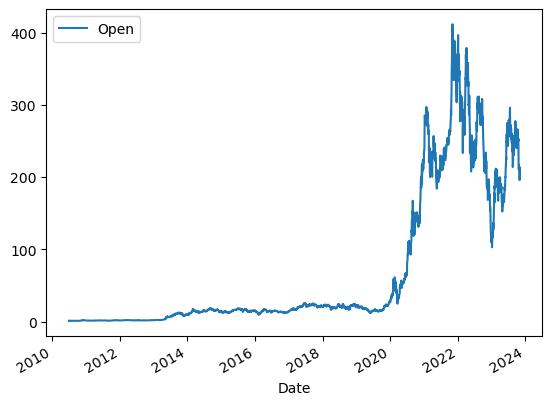

In [53]:
tesla_history.plot(x='Date', y='Open')

<Axes: xlabel='Date'>

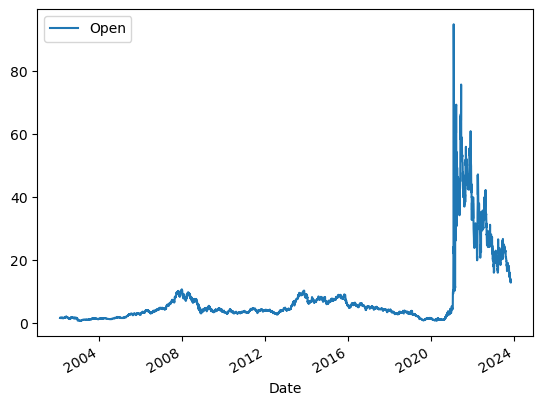

In [54]:
gamestop_history.plot(x='Date', y='Open')

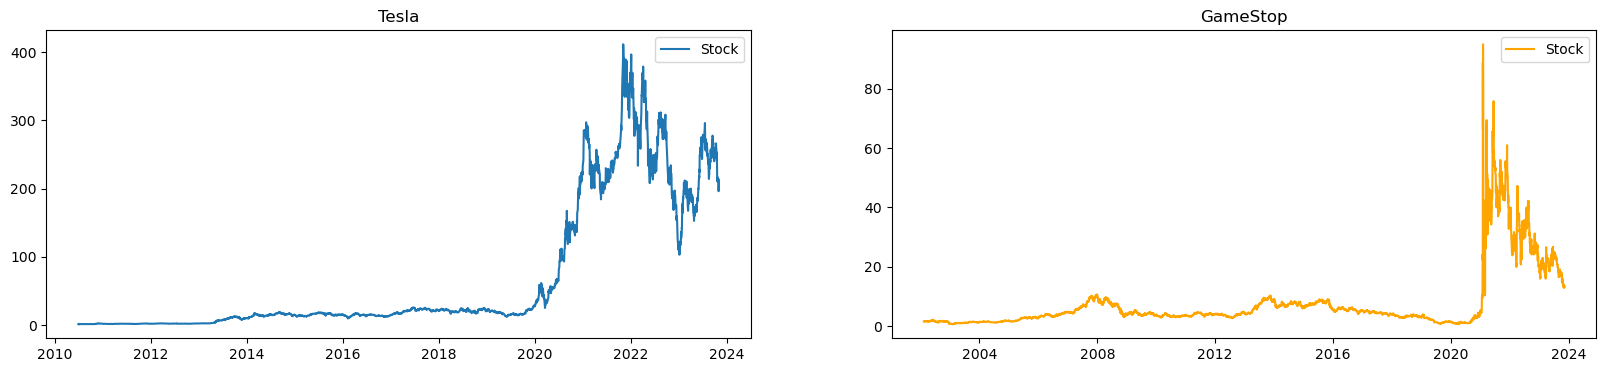

In [59]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(tesla_history["Date"], tesla_history["Open"], label='Stock')
plt.title('Tesla')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gamestop_history["Date"], gamestop_history["Open"], label="Stock", color="orange")
plt.title('GameStop')
plt.legend()

plt.show()

Question 7
    Sharing Your assigment notebook